# Data Generation

Generate synthetic data that simulates a real-world debt forgiveness problem

# Dependencies

In [1]:
import pickle
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from config import TREATMENT, OUTCOME
from modules.data_generation import (
    DataGeneration,
    add_synthetic_features
)
from utils.basics import plot_hist

warnings.filterwarnings("ignore")

# Env vars

In [2]:
n_samples = 15000
percentiles = np.arange(0, 1, 0.1)

# Utils

In [3]:
def get_high_correlations(df, features, threshold=0.7):
    # Calculate correlation matrix
    corr_matrix = df[features].corr()
    
    # Get upper triangle of correlation matrix (avoiding duplicates)
    upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    
    # Find feature pairs with absolute correlation above threshold
    high_corr_pairs = []
    for col in upper_tri.columns:
        # Get correlations above threshold for this column
        high_corr = upper_tri[col][abs(upper_tri[col]) > threshold]
        
        # Add pairs to results
        for idx, corr_value in high_corr.items():
            high_corr_pairs.append({
                'feature1': col,
                'feature2': idx,
                'correlation': round(corr_value, 3)
            })
    
    return high_corr_pairs

# Generate data

## Random financial variables

In [4]:
generator = DataGeneration()
df = generator.generate_random_financial_data(n_samples)
df.describe(percentiles=percentiles)

,years_history,n_accounts,n_loans,years_since_default,loss_given_default,default_debt_amount,n_cards,n_refin,months_since_first_payment,debt_cirbe
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000
mean,19.901323,0.321467,1.505000,4.023923,0.685903,3.961688e+04,2.271533,0.997467,40.233039,11197.259437
std,9.956142,0.622269,1.238202,2.843797,0.112186,5.363420e+04,1.675109,1.004354,40.738957,10438.792519
min,0.854947,0.000000,0.000000,0.016221,0.221684,4.522249e+02,0.000000,0.000000,0.000713,367.826838
0%,0.854947,0.000000,0.000000,0.016221,0.221684,4.522249e+02,0.000000,0.000000,0.000713,367.826838
10%,8.517745,0.000000,0.000000,1.081184,0.535438,6.599362e+03,0.000000,0.000000,4.194742,2944.046330
20%,11.330949,0.000000,0.000000,1.669619,0.590306,1.029127e+04,1.000000,0.000000,8.800674,4168.664414
30%,13.735889,0.000000,1.000000,2.220789,0.631314,1.420145e+04,1.000000,0.000000,14.142914,5334.358916
40%,16.113372,0.000000,1.000000,2.773116,0.662896,1.848071e+04,2.000000,1.000000,20.115008,6635.698148
50%,18.355331,0.000000,1.000000,3.370330,0.693433,2.385473e+04,2.000000,1.000000,27.633757,8155.997296


In [5]:
df.corr()

,years_history,n_accounts,n_loans,years_since_default,loss_given_default,default_debt_amount,n_cards,n_refin,months_since_first_payment,debt_cirbe
years_history,1.000000,0.110386,0.002987,0.011270,-0.009134,0.002656,0.000070,-0.005164,0.005732,-0.001698
n_accounts,0.110386,1.000000,0.001548,0.010800,0.000832,0.005395,0.005991,-0.023873,0.010217,-0.006328
n_loans,0.002987,0.001548,1.000000,0.002473,-0.005452,0.061717,0.000969,-0.010766,0.009117,-0.001178
years_since_default,0.011270,0.010800,0.002473,1.000000,-0.005516,-0.006448,0.003971,-0.008866,-0.003385,0.005056
loss_given_default,-0.009134,0.000832,-0.005452,-0.005516,1.000000,0.006368,-0.004562,0.017243,-0.010229,-0.016977
default_debt_amount,0.002656,0.005395,0.061717,-0.006448,0.006368,1.000000,0.011161,-0.020054,0.003435,-0.003702
n_cards,0.000070,0.005991,0.000969,0.003971,-0.004562,0.011161,1.000000,-0.007953,0.007674,-0.008097
n_refin,-0.005164,-0.023873,-0.010766,-0.008866,0.017243,-0.020054,-0.007953,1.000000,0.004776,-0.003883
months_since_first_payment,0.005732,0.010217,0.009117,-0.003385,-0.010229,0.003435,0.007674,0.004776,1.000000,-0.007319
debt_cirbe,-0.001698,-0.006328,-0.001178,0.005056,-0.016977,-0.003702,-0.008097,-0.003883,-0.007319,1.000000


## Treatment

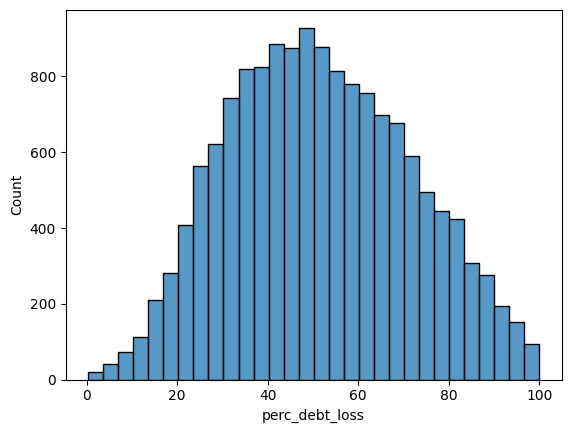

<Figure size 1000x800 with 0 Axes>

In [6]:
generator.fit_scalers(df)
df[TREATMENT] = generator.generate_treatment(df, noise=True, noise_scale=0.0, treament_noise_std=7)
plot_hist(df, TREATMENT)

## Outcome

In [7]:
df[OUTCOME + "_probs"] = generator.calculate_outcome_probability(df, df[TREATMENT])
df[OUTCOME]  = np.random.binomial(n=1, p=df[OUTCOME + "_probs"])

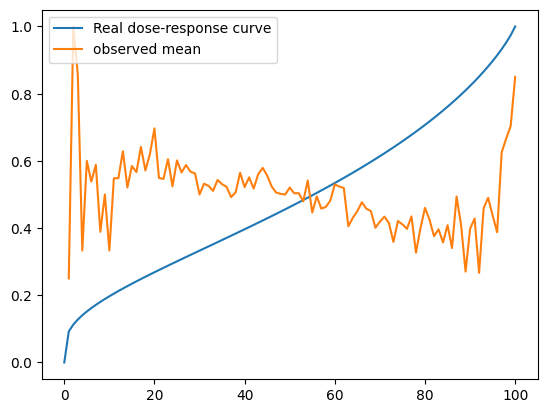

In [8]:
# Causal curves
step = 1
bin_edges = np.arange(0, 100+step, step)
real_dose_response = generator.compute_causal_effects(df, bin_edges, "ate")
bin_edges_contained = bin_edges.copy()
bin_edges_contained[0] = -1
df['treatment_bin'] = pd.cut(df[TREATMENT], bins=bin_edges_contained, labels=False)

mean_outcome = [c[0] for c in df.groupby(['treatment_bin'])[[OUTCOME]].mean().to_numpy().tolist()]
plt.plot(bin_edges, real_dose_response, label="Real dose-response curve")
plt.plot(bin_edges[1:], mean_outcome, label="observed mean")
plt.legend(loc="upper left")
plt.show()


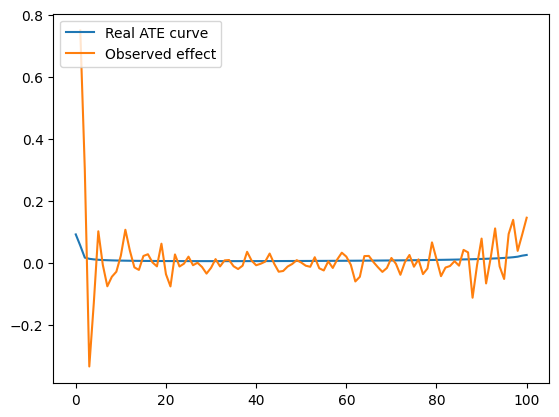

In [9]:
real_ate_curve = np.gradient(real_dose_response, bin_edges)
mean_observed_effect = np.gradient(mean_outcome, bin_edges[1:])
plt.plot(bin_edges, real_ate_curve, label="Real ATE curve")
plt.plot(bin_edges[1:], mean_observed_effect, label="Observed effect")
plt.legend(loc="upper left")
plt.show()

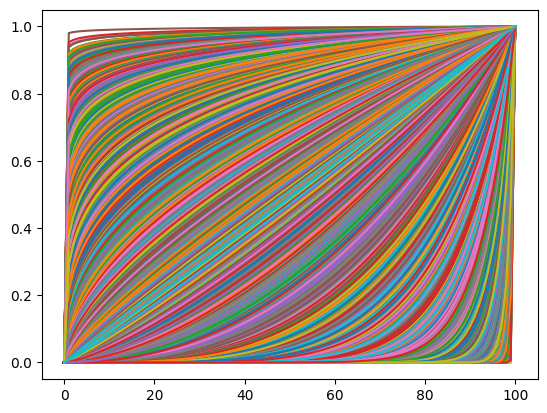

In [10]:
# Individual Causal curves
individial_dose_responses = generator.compute_causal_effects(df, bin_edges, "ite")
for i, line in enumerate(individial_dose_responses):
    ax = plt.plot(bin_edges, line, label=f'Line {i+1}')

plt.show()

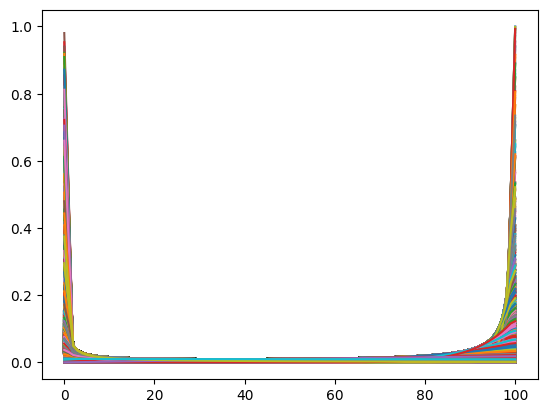

In [11]:
for i, line in enumerate(individial_dose_responses):
    real_ite_curve = np.gradient(line, bin_edges)
    ax = plt.plot(bin_edges, real_ite_curve, label=f'Line {i+1}')


plt.show()

## Redundant and Noisy features

In [12]:
df.drop(columns=['treatment_bin', 'debt_repayment_flag_probs'], inplace=True)
df = add_synthetic_features(df, n_redundant=100, n_noise=300)
df.describe()

,years_history,n_accounts,n_loans,years_since_default,loss_given_default,default_debt_amount,n_cards,n_refin,months_since_first_payment,debt_cirbe,...,noise*feature*291,noise*feature*292,noise*feature*293,noise*feature*294,noise*feature*295,noise*feature*296,noise*feature*297,noise*feature*298,noise*feature*299,noise*feature*300
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,...,1.500000e+04,1.500000e+04,1.500000e+04,1.500000e+04,1.500000e+04,1.500000e+04,1.500000e+04,1.500000e+04,1.500000e+04,1.500000e+04
mean,19.901323,0.321467,1.505000,4.023923,0.685903,3.961688e+04,2.271533,0.997467,40.233039,11197.259437,...,6.555941e-16,3.221127e-17,1.207923e-15,-5.258016e-16,8.753887e-16,1.980046e-16,4.642213e-17,1.428665e-15,1.449507e-16,7.465436e-16
std,9.956142,0.622269,1.238202,2.843797,0.112186,5.363420e+04,1.675109,1.004354,40.738957,10438.792519,...,3.000100e+00,2.000067e+00,4.000133e+00,4.000133e+00,4.000133e+00,2.000067e+00,2.000067e+00,4.000133e+00,3.000100e+00,2.000067e+00
min,0.854947,0.000000,0.000000,0.016221,0.221684,4.522249e+02,0.000000,0.000000,0.000713,367.826838,...,-9.362237e+01,-6.815706e+00,-2.617038e+01,-6.865995e+00,-5.694275e+01,-2.745820e+00,-8.989074e-01,-2.357963e+00,-2.321015e+00,-6.387958e+00
25%,12.584782,0.000000,1.000000,1.948692,0.611994,1.218692e+04,1.000000,0.000000,11.311880,4764.145729,...,-5.299980e-01,-1.363474e+00,-2.245849e+00,-2.931921e+00,-1.327008e+00,-1.465852e+00,-7.351369e-01,-1.875167e+00,-1.765174e+00,-1.371422e+00
50%,18.355331,0.000000,1.000000,3.370330,0.693433,2.385473e+04,2.000000,1.000000,27.633757,8155.997296,...,8.836169e-01,1.415538e-01,5.759173e-01,-7.403442e-01,1.037901e+00,-4.736017e-01,-4.764526e-01,-1.130961e+00,-9.390398e-01,2.582182e-01
75%,25.627086,1.000000,2.000000,5.432511,0.767660,4.709013e+04,3.000000,2.000000,55.853565,14063.580985,...,1.600850e+00,1.506418e+00,2.899439e+00,2.157592e+00,2.608851e+00,9.571594e-01,1.018253e-01,4.343543e-01,6.234765e-01,1.631575e+00
max,85.890320,7.000000,9.000000,28.435844,0.967360,1.573933e+06,12.000000,7.000000,344.761427,174599.232062,...,2.086780e+00,4.462778e+00,8.025231e+00,2.620160e+01,4.977107e+00,1.429246e+01,1.003330e+02,1.135985e+02,6.252870e+01,3.228265e+00


In [13]:
redundant_features = [c for c in df.columns if "redundant" in c]
original_features = list(df.iloc[:, :10].columns)
correlated_pairs = get_high_correlations(df, original_features+redundant_features, threshold=0.7)
print(correlated_pairs)
print(len(correlated_pairs))

[{'feature1': 'redundantfeature1_n_cards', 'feature2': 'n_cards', 'correlation': 0.846}, {'feature1': 'redundantfeature6_n_accounts', 'feature2': 'n_accounts', 'correlation': -0.72}, {'feature1': 'redundantfeature14_default_debt_amount', 'feature2': 'default_debt_amount', 'correlation': 0.829}, {'feature1': 'redundantfeature20_n_refin', 'feature2': 'n_refin', 'correlation': -0.835}, {'feature1': 'redundantfeature26_years_since_default', 'feature2': 'years_since_default', 'correlation': 0.784}, {'feature1': 'redundantfeature30_years_since_default', 'feature2': 'years_since_default', 'correlation': -0.703}, {'feature1': 'redundantfeature33_n_accounts', 'feature2': 'n_accounts', 'correlation': 0.737}, {'feature1': 'redundantfeature42_n_accounts', 'feature2': 'n_accounts', 'correlation': -0.827}, {'feature1': 'redundantfeature52_months_since_first_payment', 'feature2': 'months_since_first_payment', 'correlation': -0.831}, {'feature1': 'redundantfeature53_loss_given_default', 'feature2': 'l

In [14]:
null_counts = df.isnull().sum()
    
    # Filter to only columns that have nulls and sort by number of nulls
features_with_nulls = null_counts[null_counts > 0].sort_values(ascending=False)
features_with_nulls

Series([], dtype: int64)

# Save data

In [15]:
df.to_parquet("data/synthetic_data.parquet")

In [16]:
with open('data/data_generator.pkl', 'wb') as file:
    pickle.dump(generator, file)
